In [7]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Fetch Bitcoin historical data (we use Bitcoin to USD for this example)
btc_data = yf.download('BTC-USD', start='2016-11-04', end='2025-02-14')

# Display the first few rows of data
btc_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2016-11-04,703.234985,706.929993,685.562988,689.124023,99907696
2016-11-05,703.418030,707.510010,697.739014,703.525024,53752300
2016-11-06,711.521973,714.257996,699.559998,703.812012,59902200
2016-11-07,703.130981,710.736023,699.903015,710.736023,65047100
2016-11-08,709.848022,712.987000,702.390015,703.088989,79660800


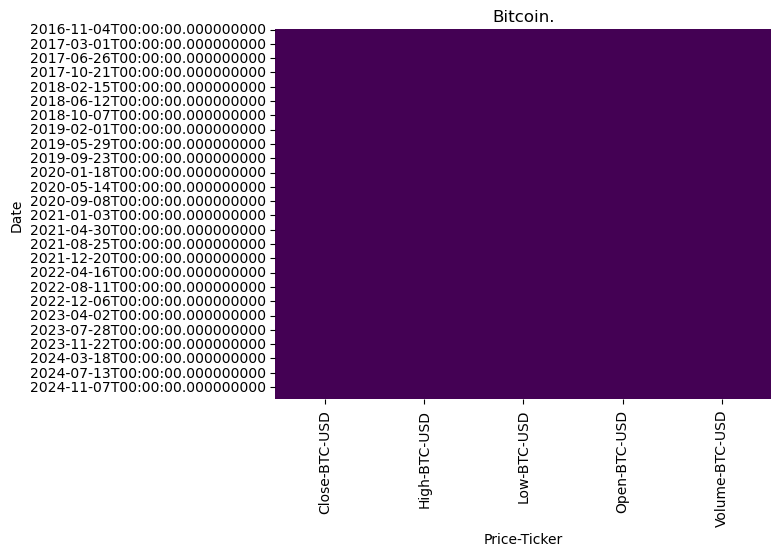

In [8]:
btc_data.isnull().sum()

sns.heatmap(btc_data.isnull(), cbar=False, cmap='viridis')
plt.title('Bitcoin.')
plt.show()

# DATA MINING & FT Engineering.

In [9]:
btc_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,3024.000000,3024.000000,3024.000000,3024.000000,3.024000e+03
mean,25691.234244,26235.590854,25062.047354,25661.109388,2.385099e+10
std,23852.420469,24334.291795,23298.343884,23823.811578,2.058966e+10
min,702.031006,705.257019,685.562988,689.124023,5.260180e+07
25%,7233.929199,7388.004883,7066.950684,7220.809082,7.538757e+09
50%,17061.476562,17329.349609,16755.583008,17006.056641,2.070619e+10
75%,40541.875000,41656.645508,39516.833008,40532.430664,3.364246e+10
max,106146.265625,109114.882812,105291.734375,106147.296875,3.509679e+11


In [13]:
btc_data.columns

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [14]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3024 entries, 2016-11-04 to 2025-02-13
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3024 non-null   float64
 1   (High, BTC-USD)    3024 non-null   float64
 2   (Low, BTC-USD)     3024 non-null   float64
 3   (Open, BTC-USD)    3024 non-null   float64
 4   (Volume, BTC-USD)  3024 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 141.8 KB


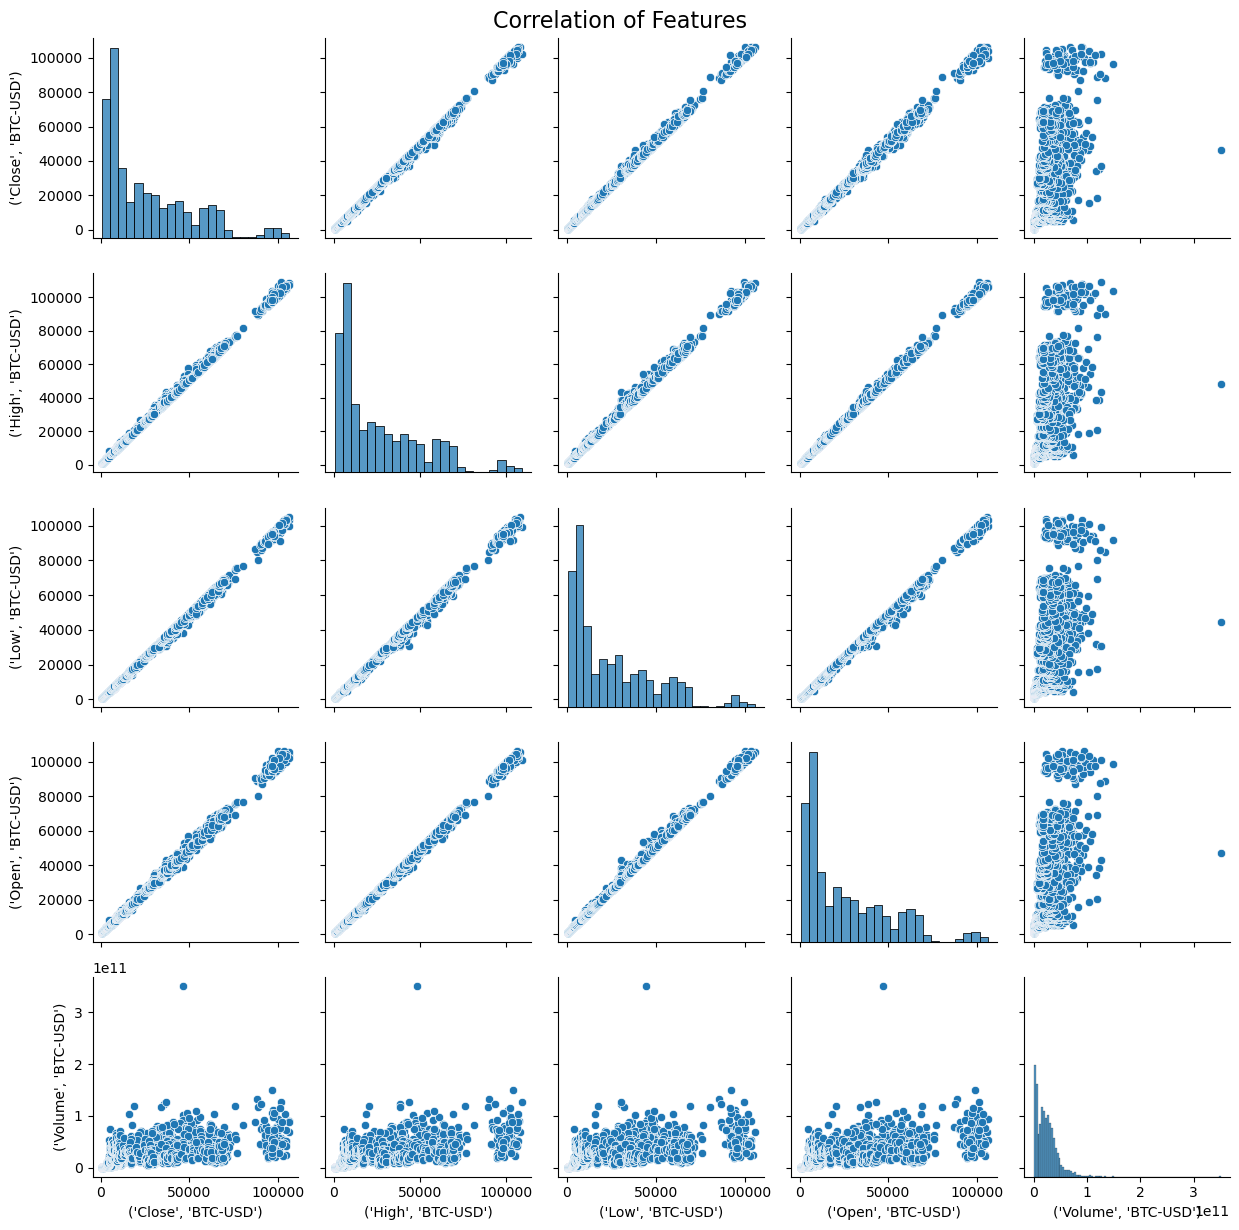

In [15]:
sns.pairplot(btc_data)

# Set the title
plt.suptitle('Correlation of Features', fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

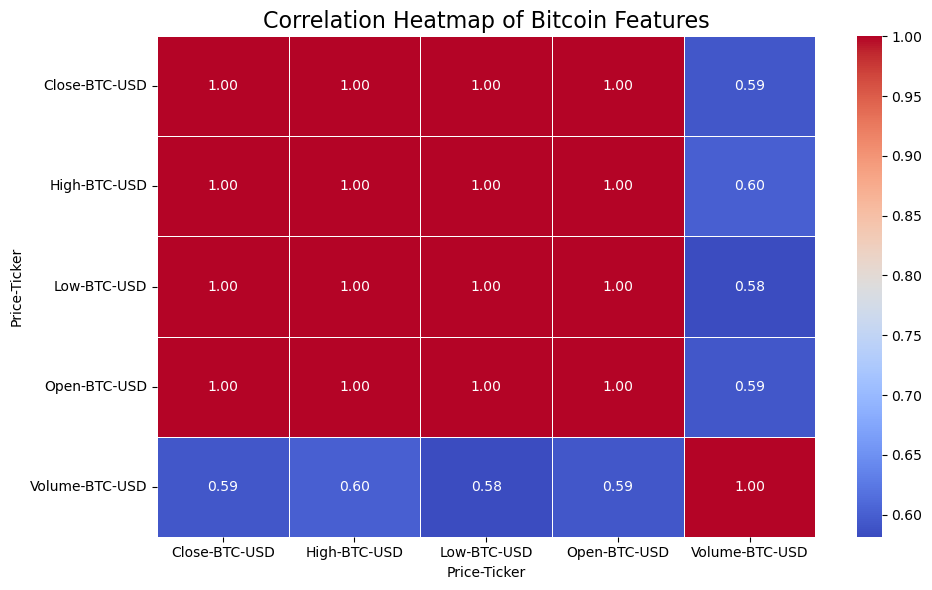

In [16]:
# Calculate the correlation matrix
corr_matrix = btc_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 6))  # Adjust the size of the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap of Bitcoin Features', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


In [17]:
# Feature engineering: Create moving averages (e.g., 7-day, 30-day)
btc_data['7_day_MA'] = btc_data['Close'].rolling(window=7).mean()
btc_data['30_day_MA'] = btc_data['Close'].rolling(window=30).mean()

# Drop rows with missing values due to rolling window
btc_data = btc_data.dropna()

# Select features and target (we'll predict the 'Close' price)
features = ['Open', 'High', 'Low', 'Volume', '7_day_MA', '30_day_MA']
target = 'Close'

# Prepare the data
X = btc_data[features]
y = btc_data[target]

In [18]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Check the shape of the splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2396, 6) (599, 6) (2396, 1) (599, 1)


In [19]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 415378.5503947382
Mean Absolute Error: 422.64727158021634
R-squared: 0.9991974318701615


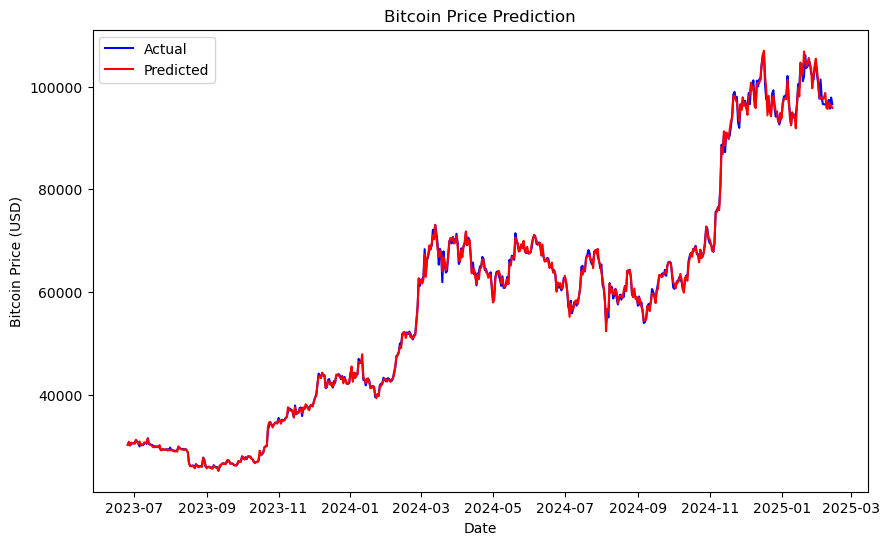

In [21]:
import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(btc_data.index[-len(y_test):], y_test, label='Actual', color='blue')
plt.plot(btc_data.index[-len(y_test):], y_pred, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')
plt.title('Bitcoin Price Prediction')
plt.legend()
plt.show()

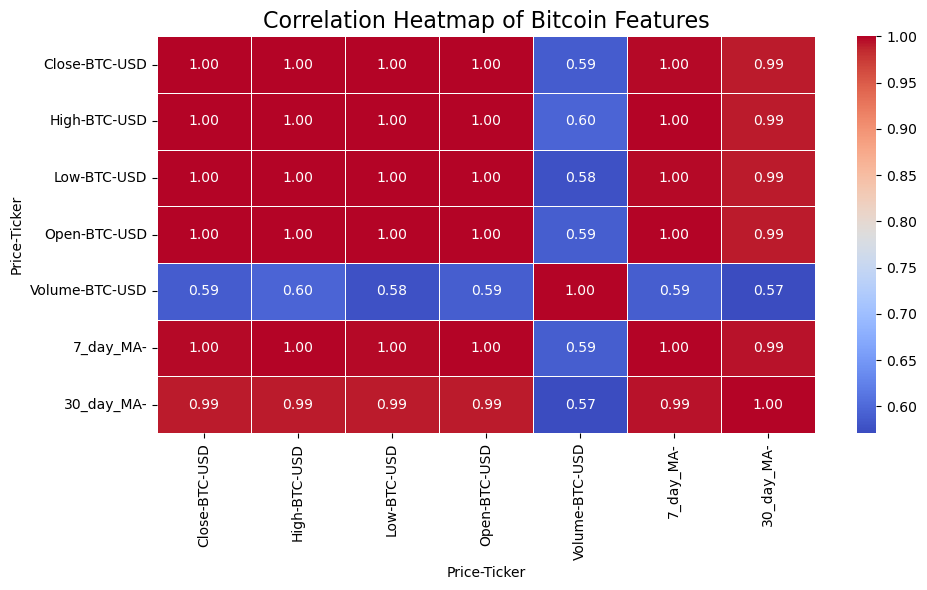

In [22]:
# Calculate the correlation matrix
corr_matrix = btc_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 6))  # Adjust the size of the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap of Bitcoin Features', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Displaying the metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Absolute Error (MAE): 422.65
Mean Squared Error (MSE): 415378.55
R-squared (R²): 1.00


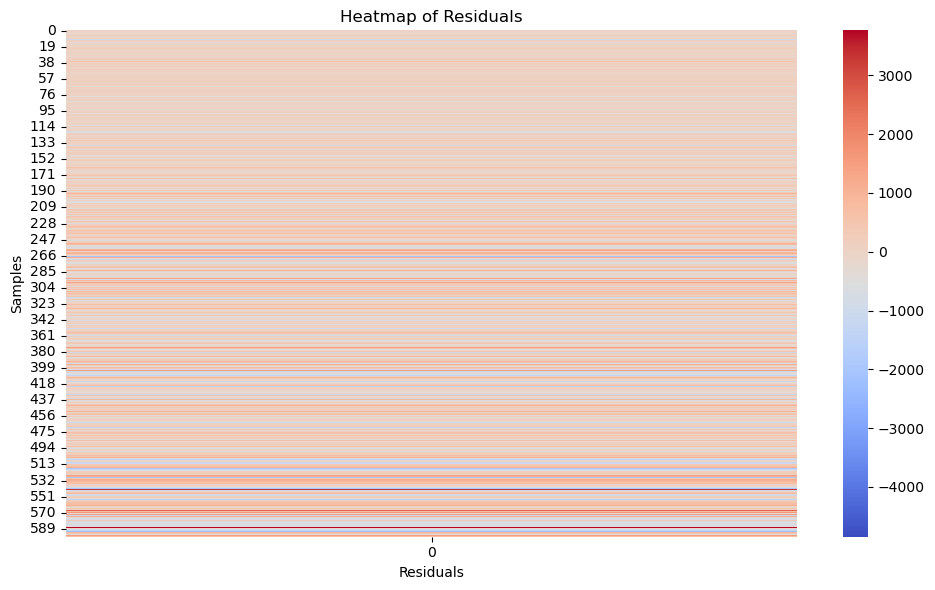

In [24]:
# Calculate residuals
residuals = y_test - y_pred

# Plot a heatmap of residuals to see if there's any pattern in errors
plt.figure(figsize=(10, 6))
sns.heatmap(residuals.values.reshape(-1, 1), annot=False, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Samples')
plt.tight_layout()
plt.show()

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics in a classification-like report
from sklearn.metrics import classification_report

# Since we are dealing with regression, we create a custom 'classification' report
print("\nRegression Metrics:")
print("-" * 40)
print(f"{'Metric':<25}{'Score'}")
print("-" * 40)
print(f"{'Mean Absolute Error (MAE)':<25}{mae:.2f}")
print(f"{'Mean Squared Error (MSE)':<25}{mse:.2f}")
print(f"{'R-squared (R²)':<25}{r2:.2f}")
print("-" * 40)


Regression Metrics:
----------------------------------------
Metric                   Score
----------------------------------------
Mean Absolute Error (MAE)422.65
Mean Squared Error (MSE) 415378.55
R-squared (R²)           1.00
----------------------------------------


[*********************100%***********************]  1 of 1 completed


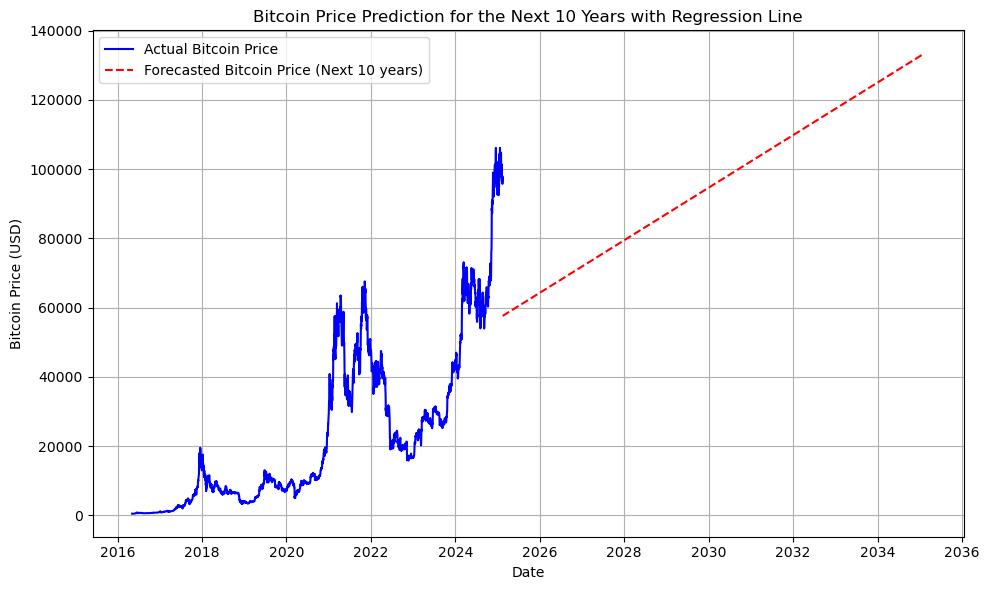

In [26]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Fetch Bitcoin historical data (we use Bitcoin to USD for this example)
btc_data = yf.download('BTC-USD', start='2016-05-06', end='2025-02-14')

# Prepare the data
btc_data['Date'] = btc_data.index
btc_data['Date'] = pd.to_datetime(btc_data['Date'])

# Convert the Date column to numeric (ordinal format) for regression modeling
btc_data['Date_ordinal'] = btc_data['Date'].map(lambda x: x.toordinal())

# Train a Linear Regression Model on the existing data
X = btc_data[['Date_ordinal']]  # Independent variable: Date
y = btc_data['Close']  # Target variable: Bitcoin Close Price

model = LinearRegression()
model.fit(X, y)

# Predict the Bitcoin price for the next 10 years
future_dates = pd.date_range(start=btc_data['Date'].max(), periods=365 * 10, freq='D')  # 10 years ahead
future_dates_ordinal = future_dates.map(lambda x: x.toordinal()).values.reshape(-1, 1)

# Predict future prices
future_prices = model.predict(future_dates_ordinal)

# Plot the actual data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(btc_data['Date'], btc_data['Close'], label='Actual Bitcoin Price', color='blue')  # Historical Data
plt.plot(future_dates, future_prices, label='Forecasted Bitcoin Price (Next 10 years)', color='red', linestyle='--')  # Forecasted Data

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')
plt.title('Bitcoin Price Prediction for the Next 10 Years with Regression Line')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.metrics import mean_absolute_percentage_error

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # in percentage
evs = explained_variance_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = len(y_test)  # Number of data points
p = X_test.shape[1]  # Number of features (predictors)
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Convert regression predictions into binary classification
# Example: Consider the next value being higher than the previous one as "1", else "0"
y_pred_binary = (y_pred > y_test.shift(1)).astype(int)  # Predicted '1' if price is higher than previous, else '0'
y_test_binary = (y_test > y_test.shift(1)).astype(int)   # Actual '1' if price is higher than previous, else '0'

# Calculate classification metrics (precision, recall, F1-score)
print("\nRegression and Classification Metrics Report:")
print("-" * 50)
print(f"{'Metric':<35}{'Score'}")
print("-" * 50)

# Print Regression Metrics
print(f"{'Mean Absolute Error (MAE)':<35}{mae:.2f}")
print(f"{'Mean Squared Error (MSE)':<35}{mse:.2f}")
print(f"{'Root Mean Squared Error (RMSE)':<35}{rmse:.2f}")
print(f"{'R-squared (R²)':<35}{r2:.2f}")
print(f"{'Mean Absolute Percentage Error (MAPE)':<35}{mape:.2f}%")
print(f"{'Explained Variance Score (EVS)':<35}{evs:.2f}")
print(f"{'Adjusted R-squared (Adj. R²)':<35}{adj_r2:.2f}")

# Print Classification Metrics
print("\nClassification Metrics:")
print("-" * 50)
print(classification_report(y_test_binary, y_pred_binary, target_names=["0", "1"]))

# Print Confusion Matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)
print("\nConfusion Matrix:")
print(conf_matrix)

print("-" * 50)


Regression and Classification Metrics Report:
--------------------------------------------------
Metric                             Score
--------------------------------------------------
Mean Absolute Error (MAE)          422.65
Mean Squared Error (MSE)           415378.55
Root Mean Squared Error (RMSE)     644.50
R-squared (R²)                     1.00
Mean Absolute Percentage Error (MAPE)0.68%
Explained Variance Score (EVS)     1.00
Adjusted R-squared (Adj. R²)       1.00

Classification Metrics:
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       293
           1       0.89      0.80      0.84       306

    accuracy                           0.85       599
   macro avg       0.85      0.85      0.85       599
weighted avg       0.85      0.85      0.85       599


Confusion Matrix:
[[264  29]
 [ 62 244]]
--------------------------------------------------


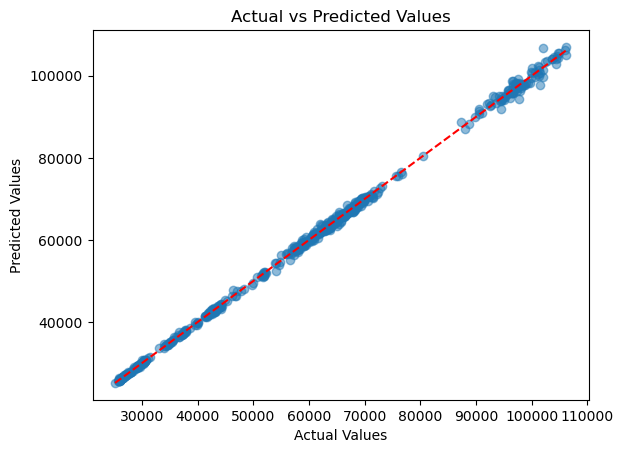

In [29]:
# Scatter Plot of Actual vs Predicted Values.
# Notes :

# What It Does: This plot visualizes the relationship between the true values (y_test) and the predicted values (y_pred) generated by the model. 
# Each point represents an individual data point, with the x-axis showing the actual values and the y-axis showing the predicted values.
# Importance: It helps to visually assess how well the model is predicting. Ideally, the points should be close to a 45-degree line 
# (i.e., the line where predicted values equal actual values). Any deviations indicate errors or biases.

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

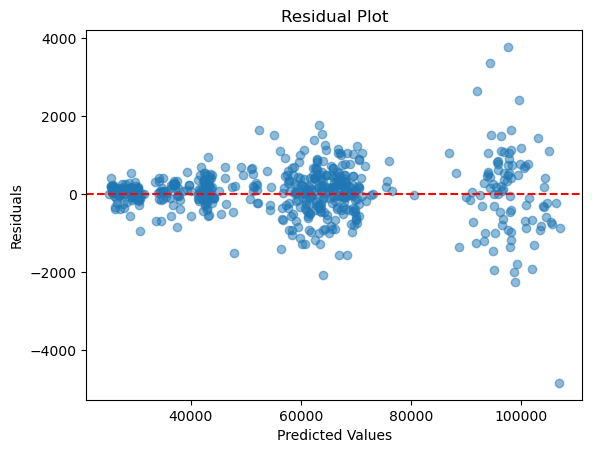

In [30]:
# Residual Plot.

# What It Does: This plot shows the residuals (the difference between actual and predicted values) on the y-axis and the predicted values on the x-axis.
# A residual is the error term (actual value minus predicted value).
# Importance: The residuals should be randomly scattered around zero without any visible patterns. 
# If there's a pattern (e.g., a curve), it suggests that the model is not fitting the data well and may need adjustment (e.g., polynomial features or different models).

residuals = y_test - y_pred

plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

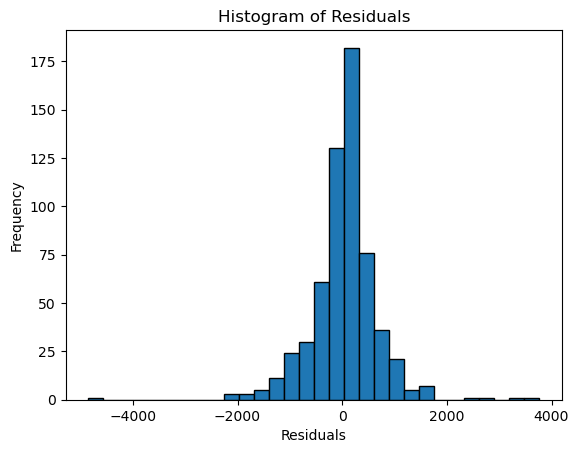

In [31]:
# Histogram of Residuals.

# What It Does: This histogram shows the distribution of residuals. The x-axis represents the residual values, and the y-axis represents their frequency.
# Importance: A normal distribution of residuals around zero is an indicator of good model performance. 
# If the residuals are not normally distributed (skewed or have outliers), 
# it suggests that the model might not be capturing the underlying data distribution properly and could be improved.

plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

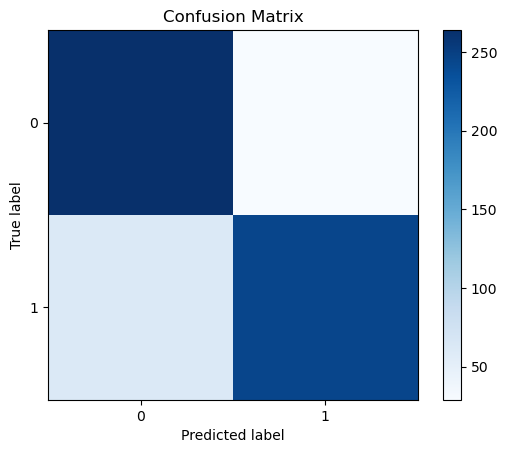

In [32]:
# Confusion Matrix

# What It Does: The confusion matrix is a table that visualizes the performance of a classification model by comparing the actual values to the predicted ones. 
# It shows true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN).
# Importance: This matrix helps you assess precision, recall, and accuracy. For example, 
# if the matrix is highly imbalanced (with many false positives or false negatives), it signals issues in the model's classification ability.

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_binary, y_pred_binary)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks([0, 1], ['0', '1'])
plt.yticks([0, 1], ['0', '1'])
plt.show()

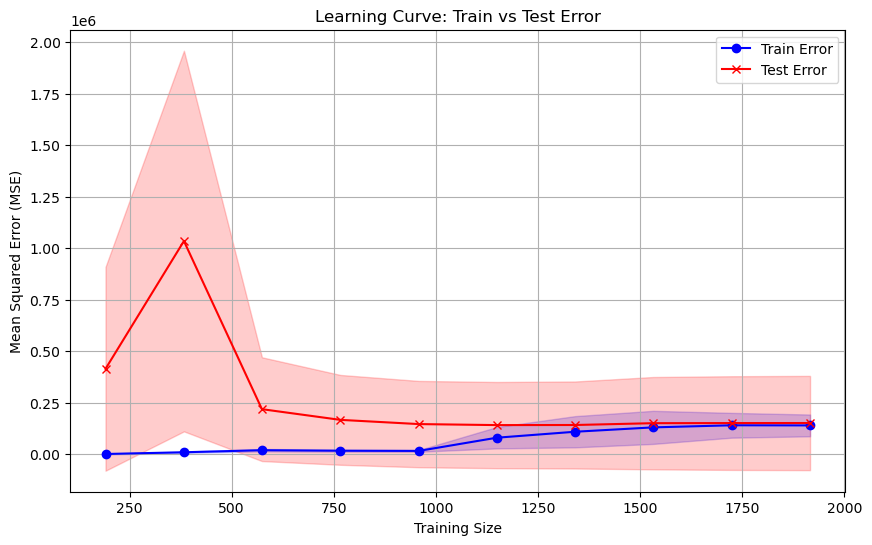

In [34]:
# Learning Curve (Train vs Test Error)

# What It Does: This plot shows how the training error and testing error evolve as more training data is used 
# (or as the number of iterations in a training process increases). The x-axis typically represents the training size or number of iterations, 
# and the y-axis represents the error (e.g., MSE or RMSE).
# Importance: A learning curve helps to assess whether the model is underfitting or overfitting. 
# If the training error keeps decreasing but the testing error increases, it suggests overfitting. 
# If both errors are high, it suggests underfitting. A good model should show both errors converging at a low value.

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

# Assuming you've already defined X_train, y_train and your model
model = LinearRegression()

# Use learning_curve function to get the train and test scores
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and std for the train and test scores
train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Plotting the learning curve
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, label="Train Error", color="blue", marker="o")
plt.plot(train_sizes, test_mean, label="Test Error", color="red", marker="x")

# Plot shaded area for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="red")

plt.title("Learning Curve: Train vs Test Error")
plt.xlabel("Training Size")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend(loc="best")
plt.grid(True)
plt.show()